In [1]:
# Importing the libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [3]:
# Load the Universal bank data

BankData = pd.read_csv(r"E:\SDP-2\S3\Universalbank.csv", header=0)

# Copy to back-up file

BankData_BK = BankData.copy()

# Display first 5 records

BankData.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
# Display the dataset information

BankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
# Count the target or dependent variable by '0' & '1' and their proportion 
# (> 10 : 1, then the dataset is imbalance data)

CreditCard_count = BankData.CreditCard.value_counts()
print('Class 0:', CreditCard_count[0])
print('Class 1:', CreditCard_count[1])
print('Proportion:', round(CreditCard_count[0] / CreditCard_count[1], 2), ': 1')
print('Total Bank records:', len(BankData))

Class 0: 3530
Class 1: 1470
Proportion: 2.4 : 1
Total Bank records: 5000


In [6]:
# Display all the columns in dataset

BankData.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [7]:
# Identify the variables to normalize with minmaxscalar

cols = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage']

In [8]:
# Delete the variables which are not influencing the target variable and display forst 5 records

del BankData['ID']
del BankData['ZIP Code']

BankData.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [9]:
# Identify the independent and Target variables

IndepVar = []
for col in BankData.columns:
    if col != 'CreditCard':
        IndepVar.append(col)

TargetVar = 'CreditCard'

x = BankData[IndepVar]
y = BankData[TargetVar]

In [10]:
# Split the data into train and test (random sampling)

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3500, 11), (1500, 11), (3500,), (1500,))

In [11]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train[cols] = mmscaler.fit_transform(x_train[cols])
x_train = pd.DataFrame(x_train)

x_test[cols] = mmscaler.fit_transform(x_test[cols])
x_test = pd.DataFrame(x_test)

# Logistic Regression Algorithm 

In [12]:
# To build the 'Logistic Regression' model with random sampling

from sklearn.linear_model import LogisticRegression

# Create an object for model

ModelLR = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, 
                             class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', 
                             verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

# Train the model

ModelLR.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelLR.predict(x_test)
y_pred_prob = ModelLR.predict_proba(x_test)

In [13]:
# To display the algorithm paramaters

params = ModelLR.get_params()
print(params)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


Confusion matrix : 
 [[  71  356]
 [  19 1054]]
Outcome values : 
 71 356 19 1054
Classification report : 
               precision    recall  f1-score   support

           1       0.79      0.17      0.27       427
           0       0.75      0.98      0.85      1073

    accuracy                           0.75      1500
   macro avg       0.77      0.57      0.56      1500
weighted avg       0.76      0.75      0.69      1500

Accuracy : 75.0 %
Precision : 78.9 %
Recall : 16.6 %
F1 Score : 0.275
Specificity or True Negative Rate : 98.2 %
Balanced Accuracy : 57.4 %
MCC : 0.282
roc_auc_score: 0.574


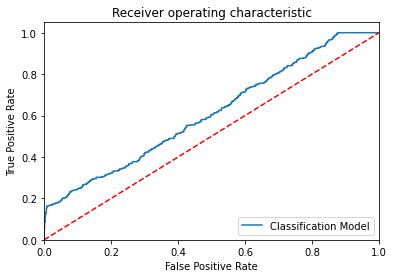

-----------------------------------------------------------------------------------------------------


In [15]:
# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Actual values

actual = y_test

# Predicted values

predicted = y_pred

# Confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# Outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# Classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# Calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%')
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, ModelLR.predict_proba(x_test)[:,1])
plt.figure()
#----------------------------------------------------
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show() 
print('-----------------------------------------------------------------------------------------------------')

In [16]:
Data_QP_New01 = psql.sqldf("select * \
                           from BankData_BK \
                           where Age < 25 \
                           and CCAvg > 2.0 \
                           ")
                           
Data_QP_New01.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,598,24,2,125,92835,2,7.20,1,0,0,1,0,0,1
1,671,23,1,61,92374,4,2.60,1,239,0,0,0,1,0
2,910,23,1,149,91709,1,6.33,1,305,0,0,0,0,1
3,2431,23,1,73,92120,4,2.60,1,0,0,0,0,1,0
4,2619,23,3,55,92704,3,2.40,2,145,0,0,0,1,0


In [17]:
# Display the shape of the new dataframe

Data_QP_New01.shape

(10, 14)